In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
customer = pd.read_excel('data/Customer_v2.xlsx')
customer.shape

(267615, 3)

In [3]:
reviews = pd.read_excel('data/Reviews.xlsx')
reviews.shape

(112732, 2)

In [4]:
sales_train = pd.read_excel('data/Sales.xlsx', sheet_name='Train')
sales_train.shape

(50820, 16)

In [5]:
sales_test = pd.read_excel('data/Sales.xlsx', sheet_name='Test')
sales_test.shape

(3780, 15)

In [6]:
reviews.head()

,Comment,BookCode
0,"This is a self-published book, and if you want...",52979
1,I was a dissapointed to see errors on the back...,22722
2,A complete waste of time. Typographical errors...,52720
3,I feel I have to write to keep others from was...,32722
4,Excellent stockings for long shifts on your fe...,84987


In [7]:

import os
import pandas as pd
import numpy as np
import re
import time



start_time = time.time()

def profiling_numeric(dataframe):
    columns = dataframe.columns
    df = pd.DataFrame(columns,columns=['column_name'])
    
#     # datatype of the each columns
#     dtypes = dataframe.dtypes.tolist()
#     dtypes_df = pd.DataFrame(dtypes,columns = ['dtypes'])
    # total counts of the each columns
    total_count = [len(dataframe[col]) for col in dataframe.columns]
    total_count_df = pd.DataFrame(total_count,columns = ['total_count'] )
    
    # max_value of the each columns
    max_value = [dataframe[col].max() for col in dataframe.columns]
    max_val_df = pd.DataFrame(max_value,columns = ['max_value'] )
    
    # min_value of the each columns
    min_value = [dataframe[col].min() for col in dataframe.columns]
    min_val_df = pd.DataFrame(min_value,columns = ['min_value'] )
    
    # calculating the occurace of maximum value
    max_val_occur = []
    for cols in dataframe.columns:
        maximum = dataframe[cols].max()
        count_max = dataframe[cols].eq(maximum).sum()
        max_val_occur.append(count_max)
    max_val_occur_df = pd.DataFrame(max_val_occur,columns = ['max_value_count'] )
    
    # calculating the occuraces of minimum value
    min_val_occur = []
    for cols in dataframe.columns:
        minimum = dataframe[cols].min()
        count_min = dataframe[cols].eq(minimum).sum()
        min_val_occur.append(count_min)
    min_val_occur_df = pd.DataFrame(min_val_occur,columns = ['min_value_count'] )
    
    # finding Maximum length of each columns
    max_length = []
    for cols in dataframe.columns:
        max_length.append(max(len(str(each)) for each in dataframe[cols] ))
    max_len_df = pd.DataFrame(max_length,columns = ['max_length'] )  
    
    # finding Minimum length of each columns
    min_length = []
    for cols in dataframe.columns:
         min_length.append(min(len(str(each)) for each in dataframe[cols] ))
    min_len_df = pd.DataFrame(min_length,columns = ['min_length'] )
    
    
    # Unique values of each columns
    unique_values = []
    for cols in dataframe.columns:
        unique_values.append(dataframe[cols].nunique())
    nunique_df = pd.DataFrame(unique_values,columns = ['unique_values'])
    
    
    #Calculating Negetive Values of each columns
    neg_count = []
    for cols in dataframe.columns:
        neg_counter = 0
        for row in dataframe[cols]:
            if row < 0:
                neg_counter += 1
        neg_count.append(neg_counter)
    neg_count_df = pd.DataFrame(neg_count,columns = ['negative_value_count'])
    
    # Zero Value Count
    zero_count = []
    for cols in dataframe.columns:
        total_count = len(dataframe[cols])
        non_zero = dataframe[cols].astype(bool).sum(axis=0)
        zero_count.append(total_count - non_zero)
    zero_count_df = pd.DataFrame(zero_count,columns = ['zero_vale_count'])
    
    # Calculating Null Count of each columns
    null_count = []
    for cols in dataframe.columns:
        total_count = len(dataframe[cols])
        null_count.append(dataframe[cols].isna().sum())
    null_count_df = pd.DataFrame(null_count,columns = ['null_value_count'])
    
    # Calculating Null percentage of each column
    null_perc = []
    for cols in dataframe.columns:
        total_count = len(dataframe[cols])
        null_count = dataframe[cols].isna().sum()
        null_percentage = (null_count/total_count)*100
        null_perc.append(null_percentage)
    null_percentage_df = pd.DataFrame(null_perc,columns = ['null_percentage'])
    
    # appending the results to exsisting DataFrame
    output_numeric = pd.concat([df,total_count_df, max_val_df, min_val_df,
                           max_val_occur_df, min_val_occur_df, nunique_df, neg_count_df, zero_count_df,max_len_df,min_len_df,
                           null_count_df, null_percentage_df],
                           axis =1).reset_index(drop=True)
    
    return output_numeric


def profiling_object(dataframe):
    columns = dataframe.columns
    df = pd.DataFrame(columns,columns=['column_name'])
    
    # total counts of the each columns
    total_count = [len(dataframe[col]) for col in dataframe.columns]
    total_count_df = pd.DataFrame(total_count,columns = ['total_count'] )
    
    
    # finding Maximum length of each columns
    max_length = []
    for cols in dataframe.columns:
        max_length.append(max(len(str(each)) for each in dataframe[cols] ))
    max_len_df = pd.DataFrame(max_length,columns = ['max_length'] )  
    
    # finding Minimum length of each columns
    min_length = []
    for cols in dataframe.columns:
         min_length.append(min(len(str(each)) for each in dataframe[cols] ))
    min_len_df = pd.DataFrame(min_length,columns = ['min_length'] )
    
    # Unique values of each columns
    unique_values = []
    for cols in dataframe.columns:
        unique_values.append(dataframe[cols].nunique())
    nunique_df = pd.DataFrame(unique_values,columns = ['unique_values'])
    
    
    # max_value of the each columns
    max_val = []
    for cols in dataframe.columns:
        max_value = max([str(sub) for sub in dataframe[cols].tolist()])
        max_val.append(max_value)
    max_val_df = pd.DataFrame(max_val,columns = ['max_value'] )

    # max_value of the each columns
    min_val = []
    for cols in dataframe.columns:
        min_value = min([str(sub) for sub in dataframe[cols].tolist()])
        min_val.append(min_value)
    min_val_df = pd.DataFrame(min_val,columns = ['min_value'] )

     # calculating the occurace of maximum value
    max_val_occur = []
    for cols in dataframe.columns:
        maximum = max([str(sub) for sub in dataframe[cols].tolist()])
        count_max = dataframe[cols].eq(maximum).sum()
        max_val_occur.append(count_max)
    max_val_occur_df = pd.DataFrame(max_val_occur,columns = ['max_value_count'] )
    
    # calculating the occuraces of minimum value
    min_val_occur = []
    for cols in dataframe.columns:
        minimum = min([str(sub) for sub in dataframe[cols].tolist()])
        count_min = dataframe[cols].eq(minimum).sum()
        min_val_occur.append(count_min)
    min_val_occur_df = pd.DataFrame(min_val_occur,columns = ['min_value_count'] )
    
    
    # extracting a subset of the main dataFrame , excluding date, time and boolean columns. is* columns contains boolean vaues
    rest = dataframe.loc[:,~dataframe.columns.str.contains('Date|Time|^is')]
    # replacing NaN values with empty string as isalnum() and isalpha() throws and error with null values.
    rest_df = rest.replace(np.nan,'',regex=True)

    #Calculating alphanumeric values of each columns
    alnum_counts = []
    for cols in rest_df.columns:
        alnum_counter = 0
        #iterating through each row of each column
        for each in rest_df[cols]:
            if each != 'TRUE' or each != 'FALSE':
                pass
            elif each.isalnum() == True and each.isalpha() == False and each.isdigit() ==False  :
                alnum_counter += 1
            else:
                pass
        alnum_counts.append(alnum_counter)
    alnum_df = pd.DataFrame(alnum_counts,columns = ['alphanumeric_count'])
    alnum_df['column_name'] = rest_df.columns

    # Calculating Null Count of each columns
    schar_count = []
    regex = re.compile('[@#!$%^&*()_+=}{~`;:?|\/]')
    for cols in dataframe.columns:
        schar_counter = 0
        for each in dataframe[cols]:
            if (regex.search(str(each)) == None):
                pass
            else:
                schar_counter +=1
        schar_count.append(schar_counter)
    schar_df = pd.DataFrame(schar_count,columns=['special_char_count'])
    
    # Calculating Null Count of each columns
    null_count = []
    for cols in dataframe.columns:
        total_count = len(dataframe[cols])
        null_count.append(dataframe[cols].isna().sum())
    null_count_df = pd.DataFrame(null_count,columns = ['null_value_count'])
    
    # Calculating Null percentage of each column
    null_perc = []
    for cols in dataframe.columns:
        total_count = len(dataframe[cols])
        null_count = dataframe[cols].isna().sum()
        null_percentage = (null_count/total_count)*100
        null_perc.append(null_percentage)
    null_percentage_df = pd.DataFrame(null_perc,columns = ['null_percentage'])
    
    # appending the results to exsisting DataFrame
    output_base = pd.concat([df, total_count_df,max_len_df,min_len_df,nunique_df,
                               max_val_df,min_val_df,max_val_occur_df,min_val_occur_df,
                               null_count_df,null_percentage_df,schar_df],
                               axis =1).reset_index(drop=True)
    
    # Joining the intermediate output with the alphaNumeric DataFrame
    output_object = pd.merge(output_base,alnum_df,how='outer',on='column_name')
    
    return output_object


def profiling_test(dataframe):
    
    df_numeric = dataframe.select_dtypes(include = np.number)
    df_object = dataframe.select_dtypes(include = np.object)
    
    output_numeric = profiling_numeric(df_numeric)
    output_object = profiling_object(df_object)
    
    # appending the results to exsisting DataFrame
    output = pd.concat([output_numeric,output_object],axis = 0 , ignore_index =True,sort = False)
    output.fillna(0,inplace =True)
  
    
    return output
    
    
    
## for single file 

# def main():
#     final_report = []
#     dataframe_list = [customer,reviews,sales_train,sales_test]
#     #collection_name = 'Advindividualuser'
#     for each in dataframe_list:
#         collection_name = each 
#         #print(collection_name)
#         start_time = time.time()
#         dataframe = each.copy()
#         print('Execution Time after reading the data for: ',collection_name,end = "")
#         print('----%s seconds ----' % (time.time() - start_time ))
#         report =  profiling_test(dataframe)
#         report.insert(loc = 0, column = 'collection_name', value = collection_name)
#         final_report.append(report)

#         final_report_df = pd.concat(final_report,ignore_index = True)
#         #final_report_df.to_csv(collection_name+'_profiling_report.csv',index =False)
#         print('Total Execution Time : ',end = "")
#         print('----%s seconds ----' % (time.time() - start_time ))



# if __name__ == '__main__':
#     main()



In [8]:
report_customer =  profiling_test(customer)
report_customer.insert(loc = 0, column = 'collection_name', value = 'customer')

report_reviews =  profiling_test(reviews)
report_reviews.insert(loc = 0, column = 'collection_name', value = 'reviews')

report_sales_train =  profiling_test(sales_train)
report_sales_train.insert(loc = 0, column = 'collection_name', value = 'sales_train')

report_sales_test =  profiling_test(sales_test )
report_sales_test.insert(loc = 0, column = 'collection_name', value = 'sales_test')

final_report = pd.concat([report_customer,report_reviews,report_sales_train,report_sales_test],axis = 0,ignore_index =True,sort = False)

#        

In [9]:
final_report

,collection_name,column_name,total_count,max_value,min_value,max_value_count,min_value_count,unique_values,negative_value_count,zero_vale_count,max_length,min_length,null_value_count,null_percentage,special_char_count,alphanumeric_count
0,customer,CustomerID,267615,18287,12346,59,1,4372,0.0,0.0,5,5,0,0.000000,0.0,0.0
1,customer,Age,267615,81,11,28,106,44,0.0,0.0,2,2,0,0.000000,0.0,0.0
2,customer,BookCode,267615,POST,10002,379,40,3684,0.0,0.0,12,1,0,0.000000,0.0,0.0
3,reviews,BookCode,112732,124987,22720,4202,11683,20,0.0,0.0,6,5,0,0.000000,0.0,0.0
4,reviews,Comment,112732,Ã‰ste es un libro que no te va a dejar igual. ...,!!!the shirts came ripped and stained!!! do no...,1,1,112670,0.0,0.0,1007,1,2,0.001774,52762.0,0.0
5,sales_train,Units Sold,50820,1.58118e+06,31.7,1,1,45872,0.0,0.0,17,4,0,0.000000,0.0,0.0
6,sales_train,Available Books in the shelf,50820,2.31441e+06,37.629,1,1,50564,0.0,0.0,17,4,0,0.000000,0.0,0.0
7,sales_train,Price,50820,22.0069,0.700696,1,1,50815,0.0,0.0,18,3,0,0.000000,0.0,0.0
8,sales_train,NewYear,50820,1,0,840,49980,2,0.0,49980.0,1,1,0,0.000000,0.0,0.0
9,sales_train,MLK,50820,1,0,1785,49035,2,0.0,49035.0,1,1,0,0.000000,0.0,0.0


In [10]:
final_report.to_csv('data/Profiling_Report_All_Columns.csv',index= False)

In [11]:
# Taking PreProcessed Data from  data repo

In [48]:
cleaned_data = pd.read_csv('data/cleaned_reviews.csv')
cleaned_data['BookCode'] = cleaned_data.BookCode.apply(str)

In [63]:
cleaned_data.shape

(112725, 4)

In [62]:
cleaned_data = cleaned_data.dropna()

In [49]:
cleaned_data.nunique()

BookCode          20
clean_text    112653
dtype: int64

# Handelling Null Values

In [50]:
cleaned_data[cleaned_data.isnull().any(axis=1)]

,BookCode,clean_text
18713,22720,NaN
42571,42722,NaN
80868,22979,NaN
95305,32720,NaN
106523,42722,NaN
108665,22722,NaN
110961,84987,NaN


In [26]:
cleaned_data.shape[0]

112732

In [27]:
print('Null Rows: ',cleaned_data[cleaned_data.isnull().any(axis=1)].shape[0])
print('Total Rows: ', cleaned_data.shape[0])
print('Total Null Percentage: ',cleaned_data[cleaned_data.isnull().any(axis=1)].shape[0]/cleaned_data.shape[0])

Null Rows:  7
Total Rows:  112732
Total Null Percentage:  6.209417024447362e-05


As we see , the BookCodes which has null value are not baised towards particular bookCodes
So , we can drop them as the it won't effect the overall sentiment of the BookCode

In [17]:
# Sentiment Analysis

In [52]:
#!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
  
# function to print sentiments 
# of the sentence. 
def sentiment(sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    sentiment_dict = sid_obj.polarity_scores(sentence) 
      
   
    # decide sentiment as positive, negative and neutral 
    if sentiment_dict['compound'] >= 0.05 : 
        return 'Positive'
  
    elif sentiment_dict['compound'] <= - 0.05 : 
        return 'Negetive'
  
    else : 
        return 'Neutral'


def sentiment_scores(sentance):
     # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    sentiment_dict = sid_obj.polarity_scores(sentance) 
     
    return sentiment_dict['compound']

In [53]:
cleaned_data['Sentiment'] = cleaned_data['clean_text'].dropna().apply(lambda x: sentiment(x) )

In [54]:
cleaned_data

,BookCode,clean_text,Sentiment
0,52979,self publish book want know whi read paragraph...,Positive
1,22722,wa dissapoint see error back cover sinc paid b...,Positive
2,52720,complet wast time typograph error poor grammar...,Negetive
3,32722,feel write keep wast money book seem written g...,Negetive
4,84987,excel stock long shift foot not tight not loos...,Positive
...,...,...,...
112727,52979,pick book advic not quit read page though cash...,Positive
112728,52720,amaz easili american mind program ani idea ima...,Positive
112729,22979,yanke move south year ago book ha help underst...,Positive
112730,42722,naiv thought base titl book would tell secular...,Negetive


In [58]:
cleaned_data['Sentiment_Score'] = cleaned_data['clean_text'].dropna().apply(lambda x: sentiment_scores(x) )

In [112]:
cleaned_data

,BookCode,clean_text,Sentiment,Sentiment_Score
0,52979,self publish book want know whi read paragraph...,Positive,0.4909
1,22722,wa dissapoint see error back cover sinc paid b...,Positive,0.4404
2,52720,complet wast time typograph error poor grammar...,Negetive,-0.8658
3,32722,feel write keep wast money book seem written g...,Negetive,-0.7602
4,84987,excel stock long shift foot not tight not loos...,Positive,0.7351
...,...,...,...,...
112727,52979,pick book advic not quit read page though cash...,Positive,0.8806
112728,52720,amaz easili american mind program ani idea ima...,Positive,0.8700
112729,22979,yanke move south year ago book ha help underst...,Positive,0.7351
112730,42722,naiv thought base titl book would tell secular...,Negetive,-0.8720


In [145]:
focused_books = cleaned_data[pd.DataFrame(cleaned_data.BookCode.tolist()).isin(book_list).values].reset_index(drop=True)
focused_books

,BookCode,clean_text,Sentiment,Sentiment_Score
0,22722,wa dissapoint see error back cover sinc paid b...,Positive,0.4404
1,84987,excel stock long shift foot not tight not loos...,Positive,0.7351
2,22979,steven wardel book pure delight recommend itto...,Positive,0.9678
3,22979,said charg onli last veri short time know new ...,Positive,0.2023
4,22720,mani use concept digit compress found book eas...,Neutral,0.0000
...,...,...,...,...
47001,22722,told ex armi buddi accur come term lay armi li...,Negetive,-0.8402
47002,22722,stark war ha action drama scienc fiction anyon...,Positive,0.2340
47003,22979,thought action hero bit unbeliev enjoy book lo...,Positive,0.4404
47004,22979,yanke born pa rais reloc south found thought p...,Positive,0.7269


In [150]:
review_sample = focused_books.sort_values('Sentiment_Score',ascending = False).groupby('BookCode').head(5).reset_index(drop=True)
review_sample.sort_values('BookCode',ascending = True).reset_index(drop=True).to_csv('data/sample_reviews.csv',index=False)

<Figure size 1728x1296 with 0 Axes>

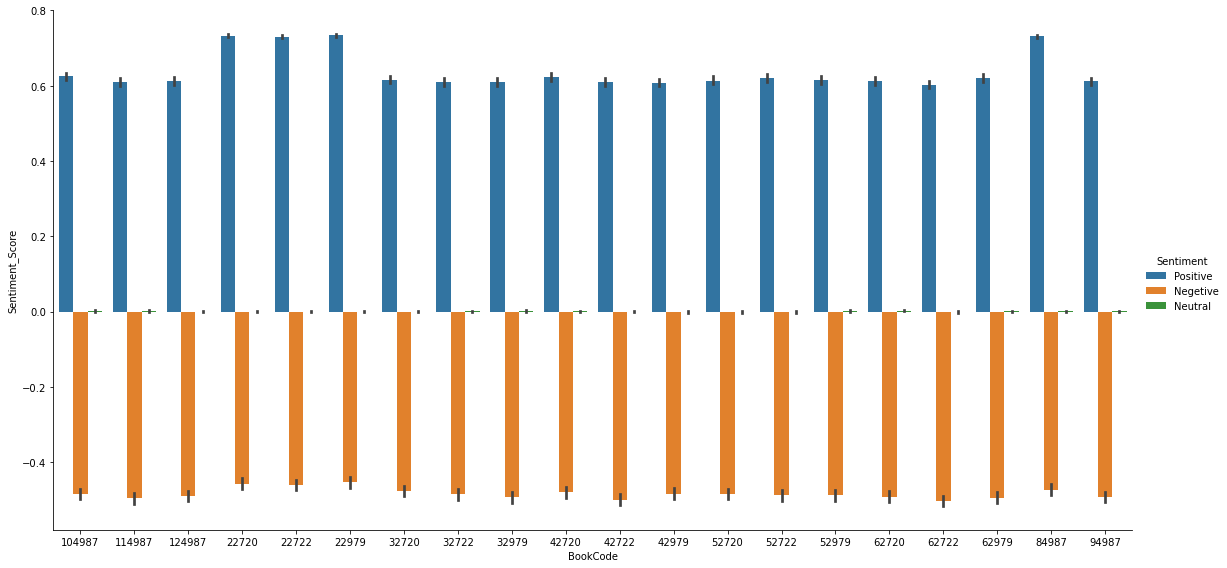

In [89]:
plt.figure(figsize=(24,18))
sns.catplot(x= 'BookCode',y= 'Sentiment_Score', hue='Sentiment', data=cleaned_data,kind='bar',aspect=2, height = 8)

In [101]:
bookcode_sentiment.reset_index()

,BookCode,Sentiment_Score
0,22979,0.595093
1,22720,0.586805
2,84987,0.581909
3,22722,0.577957
4,104987,0.251108
5,124987,0.244816
6,62979,0.242998
7,42720,0.241640
8,52722,0.241048
9,32720,0.239852


In [102]:
bookcode_sentiment = pd.DataFrame(cleaned_data.groupby('BookCode').mean()['Sentiment_Score'])
bookcode_sentiment.sort_values(by=['Sentiment_Score'], inplace=True, ascending=False)

# Top 20:
bookcode_sentiment = bookcode_sentiment.reset_index()
bookcode_sentiment.head(20)

,BookCode,Sentiment_Score
0,22979,0.595093
1,22720,0.586805
2,84987,0.581909
3,22722,0.577957
4,104987,0.251108
5,124987,0.244816
6,62979,0.242998
7,42720,0.241640
8,52722,0.241048
9,32720,0.239852


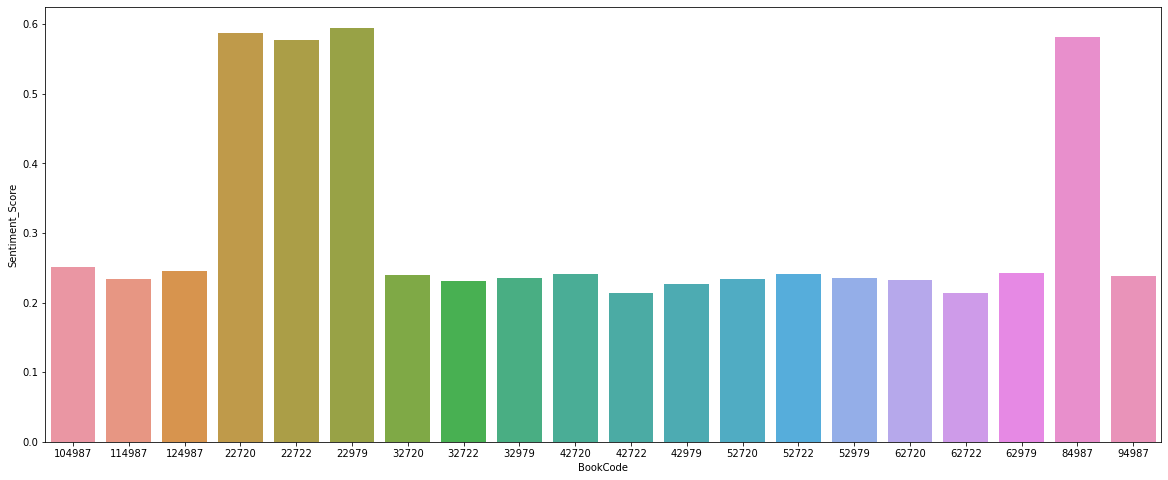

In [107]:
plt.figure(figsize=(20,8))
sns.barplot(x="BookCode", y="Sentiment_Score", data=bookcode_sentiment,ci=68)

In [128]:
bookcode_sentiment.to_csv('data/overall_book_sentiment.csv',index = False)

In [110]:
bookcode_sentiment.head(4).to_csv('data/top4_books.csv',index = False)
bookcode_sentiment.head(4)

,BookCode,Sentiment_Score
0,22979,0.595093
1,22720,0.586805
2,84987,0.581909
3,22722,0.577957


# Question 2

XYZ also wants Bridgei2i to determine the profile of customers who have given the most positive reviews

In [116]:
customer.head()

,CustomerID,BookCode,Age
0,17850,32722,19
1,17850,32979,19
2,17850,94987,19
3,17850,32720,19
4,17850,42722,19


In [127]:
customer.shape

(267615, 3)

In [117]:
customer.nunique()

CustomerID    4372
BookCode      3684
Age             44
dtype: int64

In [130]:
#book_list = list(cleaned_data['BookCode'].unique())
#selecting customer info of top 4 books 
book_list = ['22979','22720','84987','22722']
book_list

['22979', '22720', '84987', '22722']

In [132]:
focused_customers = customer[pd.DataFrame(customer.BookCode.tolist()).isin(book_list).values].reset_index(drop=True)
print(focused_customers.shape)
focused_customers.head()


(1461, 3)


,CustomerID,BookCode,Age
0,16891,84987,43
1,15426,84987,50
2,16081,84987,40
3,15005,84987,50
4,17912,84987,47


In [136]:
focused_customers['AgeGroup'] =  ['Childen' if x<18 else 'Youth' if x>=18 and x<30 else 'Adult' 
                    if x>=30 and x<60 else 'Senior' for x in focused_customers['Age']]

In [138]:
focused_customers['AgeGroup'] =  ['Pediatric Group' if x<=14 else 'Young Group' if x>=15 and x<47 else 'Middle Age Group' 
                    if x>=48 and x<63 else 'Elder Group' for x in focused_customers['Age']]

In [144]:
age_group = ['Childen' , 'Youth', 'Adult' , 'Senior']
age_band = ['(0-17 years)' , '(18-29 years)' , '(30-59 years)','(60 years and above)']

pd.DataFrame({'AgeGroup':age_group,'AgeBracket':age_band}).to_csv('data/ageGroups.csv', index = False)

In [139]:
focused_customers

,CustomerID,BookCode,Age,AgeGroup
0,16891,84987,43,Young Group
1,15426,84987,50,Middle Age Group
2,16081,84987,40,Young Group
3,15005,84987,50,Middle Age Group
4,17912,84987,47,Elder Group
...,...,...,...,...
1456,15525,22722,51,Middle Age Group
1457,17631,22722,45,Young Group
1458,17436,22979,38,Young Group
1459,14415,22979,47,Elder Group


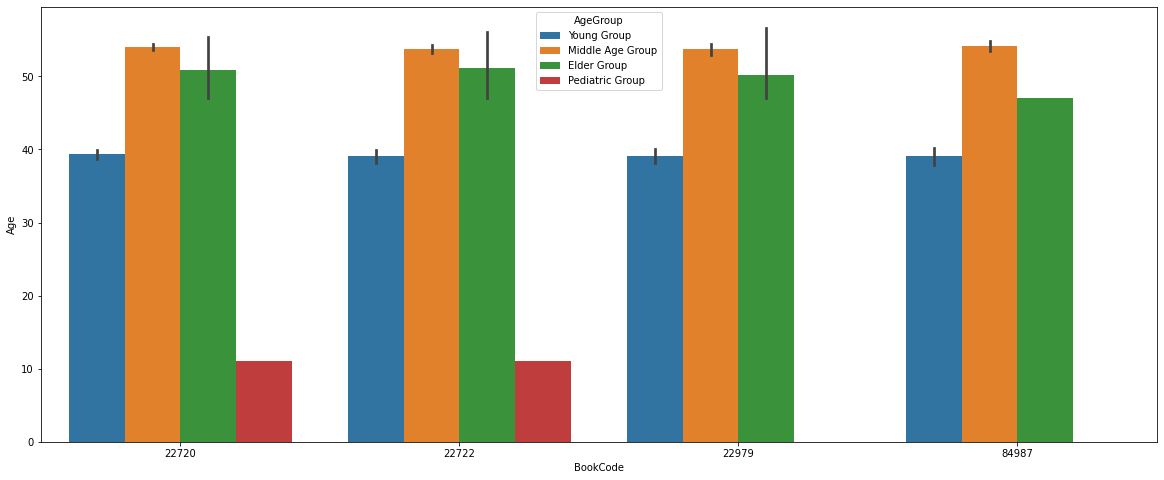

In [140]:
plt.figure(figsize=(20,8))
sns.barplot(x="BookCode", y="Age", hue="AgeGroup", data=focused_customers)